# Pruebas de Hipótesis

Ya hemos discutidos algunos de los elementos teóricos más básicos. Veamos, ahora, la aplicación.

## Pruebas de Hipótesis para Proporciones:

### Ejemplo: admitidos a UCB (University of California at Berkeley)

Históricamente la proporción de admitidos ha sido de 40% con un nivel de significancia de 0.01 la proporción de admitidos para 1973 es menor que la histórica?

¿Cómo lo resolvemos?

Primero, planteemos las hipótesis:

$$
H_{0} : p \geq 0.4 \qquad H_{1}: p < 0.4
$$

En primer lugar, requerimos algunas librerías:

In [2]:
# si no están instaladas las librerías
# install.packages("IPSUR")
# istall.packages("HH")

library(IPSUR)
library(HH)

Loading required package: lattice
Loading required package: grid
Loading required package: latticeExtra
Loading required package: RColorBrewer
Loading required package: multcomp
Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser

Loading required package: gridExtra


Traigamos los datos (el ejemplo hace uso de datos propios del programa):

In [3]:
A <- as.data.frame(UCBAdmissions)
head(A)

Admit,Gender,Dept,Freq
Admitted,Male,A,512
Rejected,Male,A,313
Admitted,Female,A,89
Rejected,Female,A,19
Admitted,Male,B,353
Rejected,Male,B,207


Construimos la respectiva tabla de frecuencias:

In [4]:
##  Tabla de Frecuencias
xtabs(Freq ~ Admit, data = A)

Admit
Admitted Rejected 
    1755     2771 

In [5]:
# Veamos la función que vamos a usar:
args(prop.test)

function (x, n, p = NULL, alternative = c("two.sided", "less", 
    "greater"), conf.level = 0.95, correct = TRUE) 
NULL

In [6]:
# Realizamos la prueba de hipótesis:
prop.test(1755, 1755 + 2771, p = 0.4, alternative = "less", conf.level = 0.99, correct = FALSE)


	1-sample proportions test without continuity correction

data:  1755 out of 1755 + 2771, null probability 0.4
X-squared = 2.8255, df = 1, p-value = 0.04639
alternative hypothesis: true p is less than 0.4
99 percent confidence interval:
 0.0000000 0.4047326
sample estimates:
        p 
0.3877596 


Warning message in arrows(xbar2, par()$usr[3:4] + c(-0.01, 0.01), xbar2, par()$usr[3:4], :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(xbar2, par()$usr[3:4] + c(-0.01, 0.01), xbar2, par()$usr[3:4], :
"zero-length arrow is of indeterminate angle and so skipped"

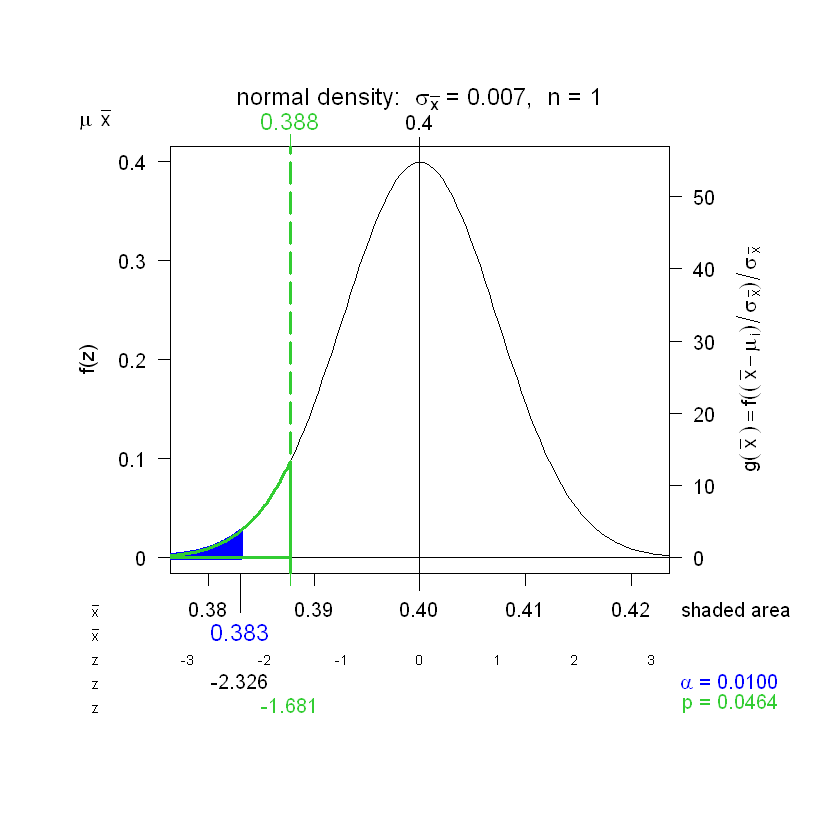

In [7]:
# Gráficamente tenemos:
temp <- prop.test(1755, 1755 + 2771, p = 0.4, alternative = "less", conf.level = 0.99, correct = FALSE)
plot(temp, "Hypoth")

##### Conclusión:

Con un nivel de significacian $\alpha = 0.01$ la evidencia sugiere que la proporción de admitidos en 1973 es menor que la histórica

## Diferencia de Medias

Se tienen los resultados de un experimento para comparar los rendimientos (medidos por el peso de las plantas) obtenidos bajo un control y dos condiciones de tratamiento diferentes. Se busca determinar:
* Si el peso medio de las plantas es diferente de 5 considerando que la varianza es conocida
* El peso promedio de las plantas es mayor que 10

¿Cómo lo resolvemos?

Primero, veamos las funciones que vamos a emplear:

In [9]:
library(TeachingDemos)

In [10]:
args(z.test)

function (x, mu = 0, stdev, alternative = c("two.sided", "less", 
    "greater"), sd = stdev, n = length(x), conf.level = 0.95, 
    ...) 
NULL

In [11]:
args(t.test)

function (x, ...) 
NULL

```
## Default S3 method:
t.test(x, y = NULL,
       alternative = c("two.sided", "less", "greater"),
       mu = 0, paired = FALSE, var.equal = FALSE,
       conf.level = 0.95, ...)

## S3 method for class 'formula'
t.test(formula, data, subset, na.action, ...)
```

In [13]:
# Vemos los datos
head(PlantGrowth)

weight,group
4.17,ctrl
5.58,ctrl
5.18,ctrl
6.11,ctrl
4.50,ctrl
4.61,ctrl


Cómo queda la primera hipótesis:

$$
H_{0} : \overline{x} = 5 \qquad H_{1}: \overline{x} \neq 5
$$

In [15]:
# Primero, la prueba que considera la varianza conocida
with(PlantGrowth, z.test(weight, mu=5, sd = sd(weight)))


	One Sample z-test

data:  weight
z = 0.57023, n = 30.00000, Std. Dev. = 0.70119, Std. Dev. of the sample
mean = 0.12802, p-value = 0.5685
alternative hypothesis: true mean is not equal to 5
95 percent confidence interval:
 4.822086 5.323914
sample estimates:
mean of weight 
         5.073 


#### Conclusión

Con un nivel de confianza de $95\%$, la evidencia sugiere que la media del peso de las plantas es igual a 5

Cómo queda la segunda hipótesis:

$$
H_{0} : \overline{x} \leq 10 \qquad H_{1}: \overline{x} > 10
$$

In [17]:
with(PlantGrowth, t.test(weight,mu=10, alternative = 'greater'))


	One Sample t-test

data:  weight
t = -38.486, df = 29, p-value = 1
alternative hypothesis: true mean is greater than 10
95 percent confidence interval:
 4.855479      Inf
sample estimates:
mean of x 
    5.073 


#### Conclusión

Con un nivel de confianza de $95\%$, la evidencia sugiere que el peso medio de las plantas no es mayor que 10

## Medias Independientes

In [20]:
head(sleep)

extra,group,ID
0.7,1,1
-1.6,1,2
-0.2,1,3
-1.2,1,4
-0.1,1,5
3.4,1,6


In [18]:
### medias independientes

t.test(extra ~ group, data = sleep, paired = TRUE)


	Paired t-test

data:  extra by group
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 
